# Exercise 2

* load the dataset: "../data/weight-height.csv"
* inspect it
* plot it using a scatter plot with Weight as a function of Height
* plot the male and female populations with 2 different colors on a new scatter plot
* rememeber to label the axes

In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/weight-height.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [6]:
df["Gender"].value_counts()

Gender
Male      5000
Female    5000
Name: count, dtype: int64

<Axes: xlabel='Height', ylabel='Weight'>

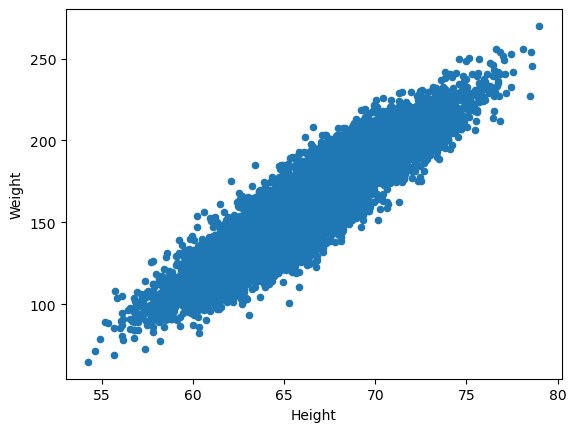

In [7]:
df.plot(
    kind = "scatter",
    y = "Weight",
    x = "Height"
)

<Axes: title={'center': 'Male & Female Populations'}, xlabel='Height', ylabel='Weight'>

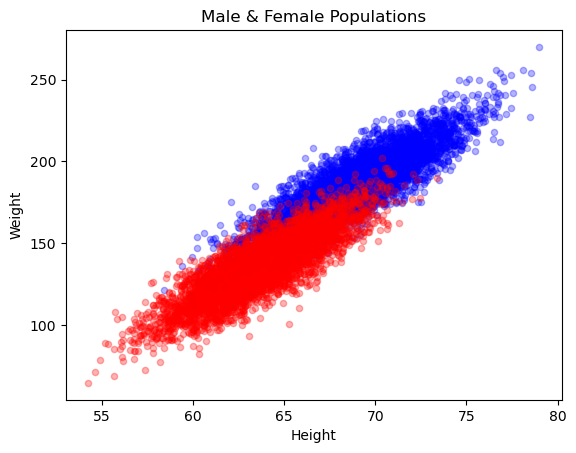

In [8]:
#Solution 1 two df
males = df[df['Gender'] == 'Male']
females = df.query('Gender == "Female"')
fig, ax = plt.subplots()
males.plot(
    kind = "scatter",
    x = "Height",
    y = "Weight",
    ax = ax,
    color = "blue",
    alpha = 0.3,
    title = "Male & Female Populations"
)

females.plot(
    kind = "scatter",
    x = "Height",
    y = "Weight",
    ax = ax,
    color = "red",
    alpha = 0.3,
)    

<Axes: title={'center': 'Male & Female Popultations'}, xlabel='Height', ylabel='Weight'>

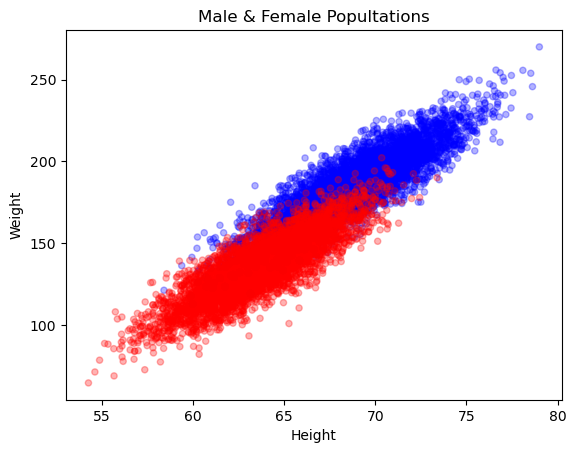

In [9]:
df['Gendercolor'] = df['Gender'].map({'Male': 'blue', 'Female':'red'})
df.plot(kind = "scatter",
        x = "Height",
        y = "Weight",
        c = df['Gendercolor'],
        alpha = 0.3,
        title = "Male & Female Popultations"
       )


Text(0.5, 1.0, 'Male & Female Population')

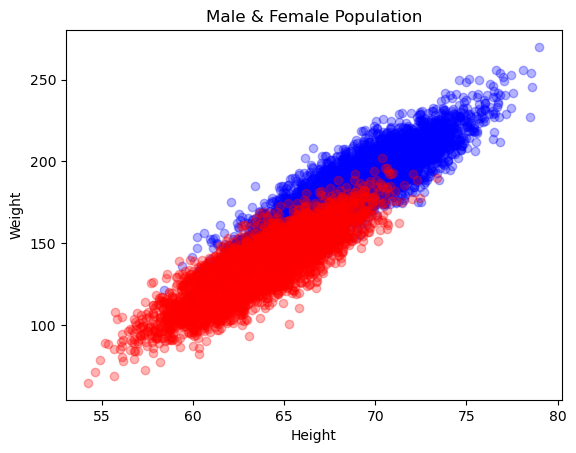

In [10]:
fig, ax = plt.subplots()
ax.plot(
    males['Height'], 
    males['Weight'], 
    'ob',
    females['Height'],
    females['Weight'],
    'or',
    alpha = 0.3
)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Male & Female Population')


# Exercise 3
* plot the histogram of the heights for males and for females on the same plot
* use alpha to control transparency in the plot command
* plt a vertical line at the mean of each population using plt.axvline()

Text(0.5, 0, 'Height')

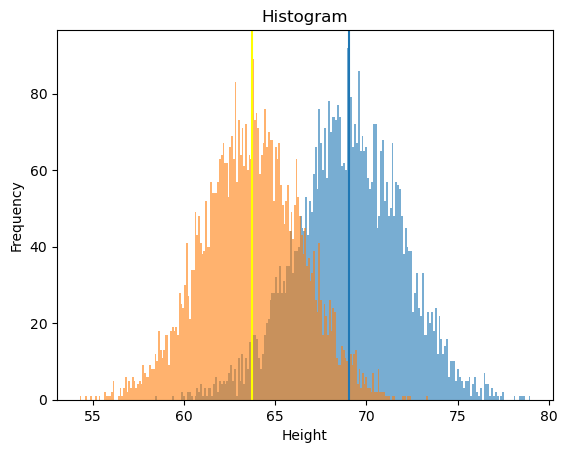

In [28]:
fig, ax = plt.subplots()
bins = 200
males['Height'].plot(
    kind='hist',
    bins=bins,
    title='Histogram',
    alpha=0.6,
    ax=ax
)
females['Height'].plot(
    kind='hist',
    bins=bins,
    title='Histogram',
    alpha=0.6,
    ax=ax
)

plt.axvline(
    x=males['Height'].mean()
)

plt.axvline(
    x=females['Height'].mean(),
    color="yellow"
)

plt.xlabel("Height")



# Exercise 5
* plot the weights of the males and females using a box plot
* which one is easier to read?
* (remember to put in titles, axes and legends)

In [47]:
dfpvt = df.pivot(columns = 'Gender', values = 'Weight')
dfpvt.info()
dfpvt.head()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Female  5000 non-null   float64
 1   Male    5000 non-null   float64
dtypes: float64(2)
memory usage: 234.4 KB


Gender,Female,Male
0,NaN,241.893563
1,NaN,162.310473
2,NaN,212.740856
3,NaN,220.042470
4,NaN,206.349801


<Axes: >

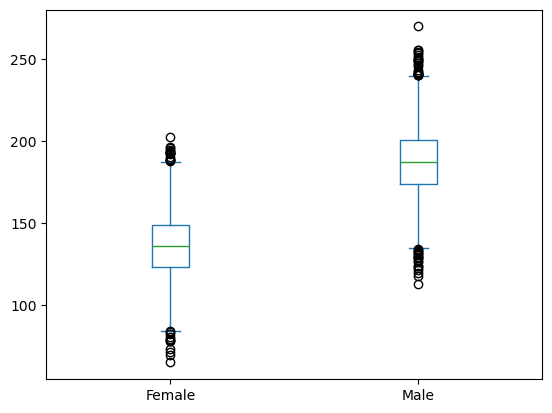

In [48]:
dfpvt.plot(kind='box')